# Goal

* numerically stabilize large shifts in `simSPI.linear_simulator.shift_utils`

In [88]:
from simSPI.linear_simulator.shift_utils import Shift
from attrdict import AttrDict
import torch
from torch import tensor
import matplotlib.pyplot as plt
from compSPI.transforms import fourier_to_primal_2D, primal_to_fourier_2D
import math

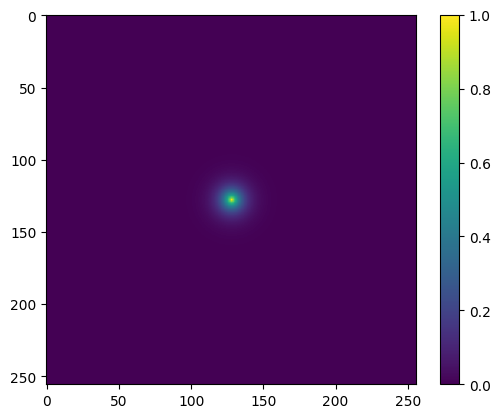

In [89]:
test_scale=2
n_pix = 128*test_scale
arr_1d = torch.arange(-n_pix//2,n_pix//2).float()
y, x = torch.meshgrid(arr_1d,arr_1d)
r = torch.hypot(x,y)
a = 0.25/math.sqrt(test_scale)
gauss_blob = torch.exp(-a*r)

ax = plt.imshow(gauss_blob)
plt.colorbar(ax)

In [90]:
gauss_blob_f = primal_to_fourier_2D(gauss_blob[None,None,...])

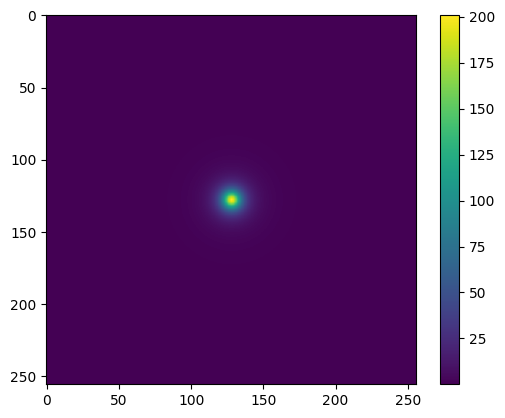

In [91]:
ax = plt.imshow(gauss_blob_f.abs()[0,0])
plt.colorbar(ax)

In [92]:
pixel_size=1.1
config = AttrDict({
    'pixel_size':pixel_size,
    'side_len':n_pix
                  })

shift = Shift(config)

large shifts result in numerical instabilities from aliasing. consider upsampling
large shifts result in numerical instabilities from aliasing. consider upsampling
large shifts result in numerical instabilities from aliasing. consider upsampling


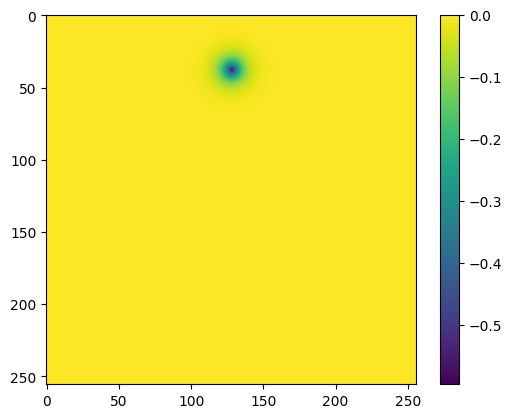

In [128]:
gauss_blob_f = primal_to_fourier_2D(gauss_blob[None,None,...])
for piece in [15,15,15]:
    t_x, t_y = tensor([0.]),tensor([test_scale*pixel_size*piece])
    gauss_blob_f = shift.phase_shift(gauss_blob_f,t_x, t_y)
gauss_blob_shifted = fourier_to_primal_2D(gauss_blob_f).real # need to take real part here!
    
ax = plt.imshow(gauss_blob_shifted[0,0])
plt.colorbar(ax)

large shifts result in numerical instabilities from aliasing. consider upsampling
large shifts result in numerical instabilities from aliasing. consider upsampling
large shifts result in numerical instabilities from aliasing. consider upsampling


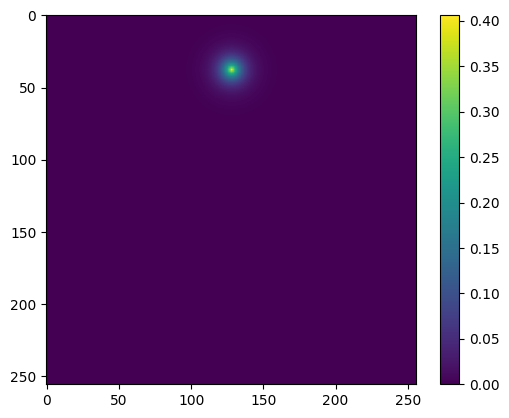

In [127]:
gauss_blob_f = primal_to_fourier_2D(gauss_blob[None,None,...])
for piece in [15,15,15]:
    t_x, t_y = tensor([0.]),tensor([test_scale*pixel_size*piece])
    gauss_blob_shifted_f = shift.phase_shift(gauss_blob_f,t_x, t_y)
    gauss_blob_shifted = fourier_to_primal_2D(gauss_blob_shifted_f).real # need to take real part here!
    gauss_blob_f = primal_to_fourier_2D(gauss_blob_shifted)
    
ax = plt.imshow(gauss_blob_shifted[0,0])
plt.colorbar(ax)

large shifts result in numerical instabilities from aliasing. consider upsampling


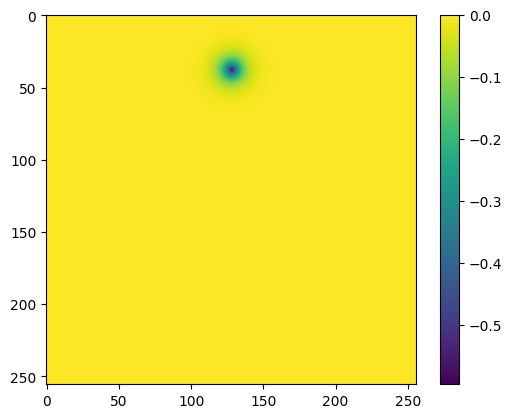

In [125]:
gauss_blob_f = primal_to_fourier_2D(gauss_blob[None,None,...])

t_x, t_y = tensor([0.]),tensor([test_scale*pixel_size*45])
gauss_blob_shifted_f = shift.phase_shift(gauss_blob_f,t_x, t_y)
gauss_blob_shifted = fourier_to_primal_2D(gauss_blob_shifted_f).real

ax = plt.imshow(gauss_blob_shifted[0,0])
plt.colorbar(ax)

|shift | effect | 
|-|-|
|30|ok|
|32|+ artefacts. scale close to zero|
|35|flipped scale|
|40|flipped scale|

In [106]:
frequency = 1.0 / (config.side_len * config.pixel_size)
n_half_len = float(config.side_len // 2)
ax = torch.arange(-n_half_len, n_half_len + config.side_len % 2)
ax = torch.flip(ax, dims=[0])
mx, my = torch.meshgrid(ax, ax)


n_big=0
arg = -2 * math.pi * 1j * frequency * (mx * t_y + my * t_x + n_big) 
modulation = torch.exp(arg)

In [107]:
factor = (arg.imag.abs().max().item() / (2*math.pi))
assert n_pix / factor > 8

7.999999777379725

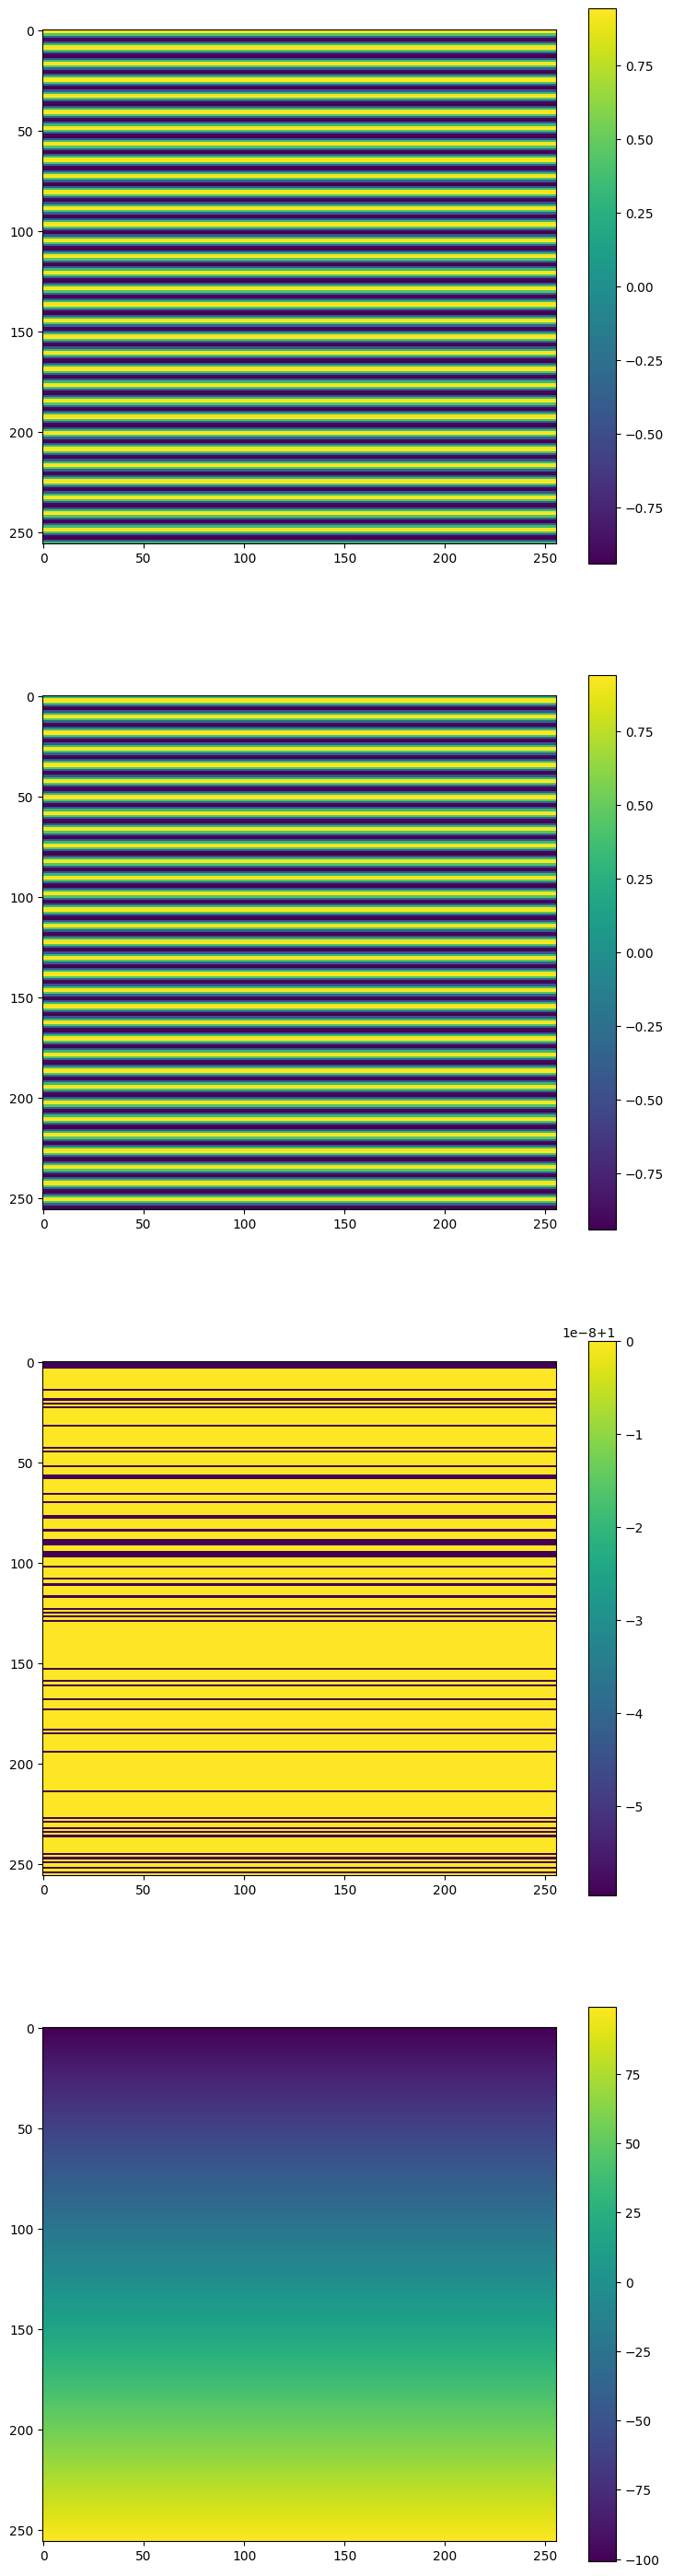

In [15]:
scale=3
fig, axes = plt.subplots(nrows=4, figsize=(scale*3,scale*12))

ax0 = axes[0].imshow(modulation.real, interpolation='none') ; fig.colorbar(ax0)
ax1 = axes[1].imshow(modulation.imag, interpolation='none') ; fig.colorbar(ax1)
ax2 = axes[2].imshow(modulation.abs(), interpolation='none') ; fig.colorbar(ax2)
ax3 = axes[3].imshow(arg.imag, interpolation='none') ; fig.colorbar(ax3)
